# psyplot: The interactive python analysis framework

<div>
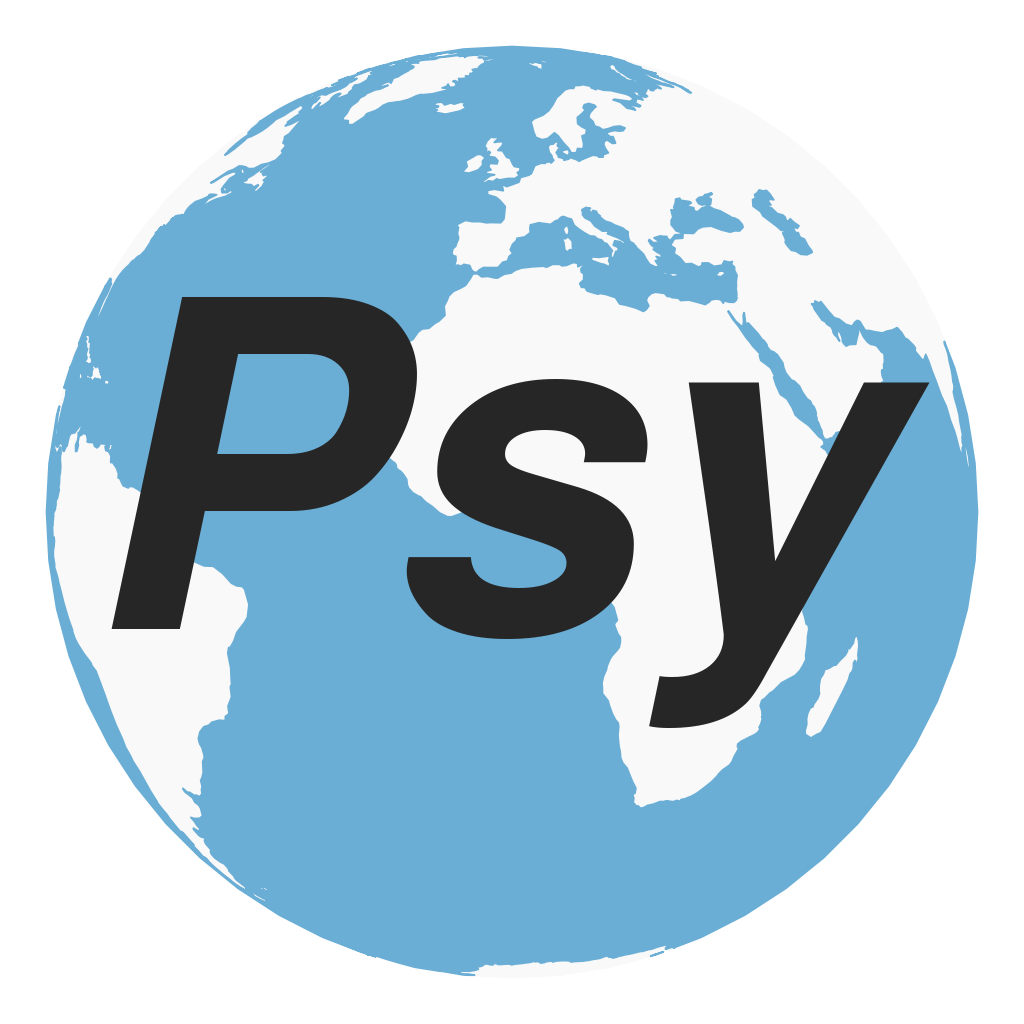
</div>

<div style="text-align: right"><b>Philipp S. Sommer<br>Helmholtz-Zentrum Geesthacht, February 4th 2020</b></div>

## Motivation

<table style="width: 100%; font-size: 18px">
<tr>
<td style="text-align: left">
Current tools either focus on
<ul>
<li>Data visualization (ncview, Panoply, Paraview, etc.)</li>
<li>data processing (Python, R)</li>
</ul>
</td>
<td>
    <center><b>ncview</b></center><br>
    <img src="figures/ncview.png" width="75%">
</td>
<td>
    <center><b>ArcGIS</b></center><br>
    <img src="figures/arcgis.png" width="75%">
</td>
</tr>
<tr>
<td style="text-align: left;">
No solution available that
<ul>
<li>Is (easily) scriptable</li>
<li>And has a Graphical User Interface</li>
<li>Treats data processing and visualization hand in hand</li>
</ul>
</td>
<td>
    <center><b>Panoply</b></center><br>
    <img src="figures/panoply.png" width="75%">
</td>
<td>
    <center><b>Paraview</b></center><br>
    <img src="figures/paraview.png" width="75%">
</td>
</tr>
</table>


# Motivation

<table style="width: 100%; font-size: 18px; vertical-align: top;">
    <tr>
        <td style="text-align: left; width: 40%">
            <b>Interactive data visualization with Python</b>
        </td>
        <td>
            <img src="figures/psyplot-python-shell.png">
        </td>
    </tr>
    <tr style="vertical-align: top">
        <td style="text-align: left; width: 30%; vertical-align: top">
            <ul>
            <li>Scriptable</li>
            <li>Graphical user interface (with built-in command line)</li>
            <li>Publication-ready and reproducible figures</li>
            <li>Flexible and extensible framework</li>
            </ul>
        </td>
        <td>
            <img src="figures/psyplot-gui-screenshot.png">
        </td>
    </tr>
</table>

## The psyplot data model

<div>
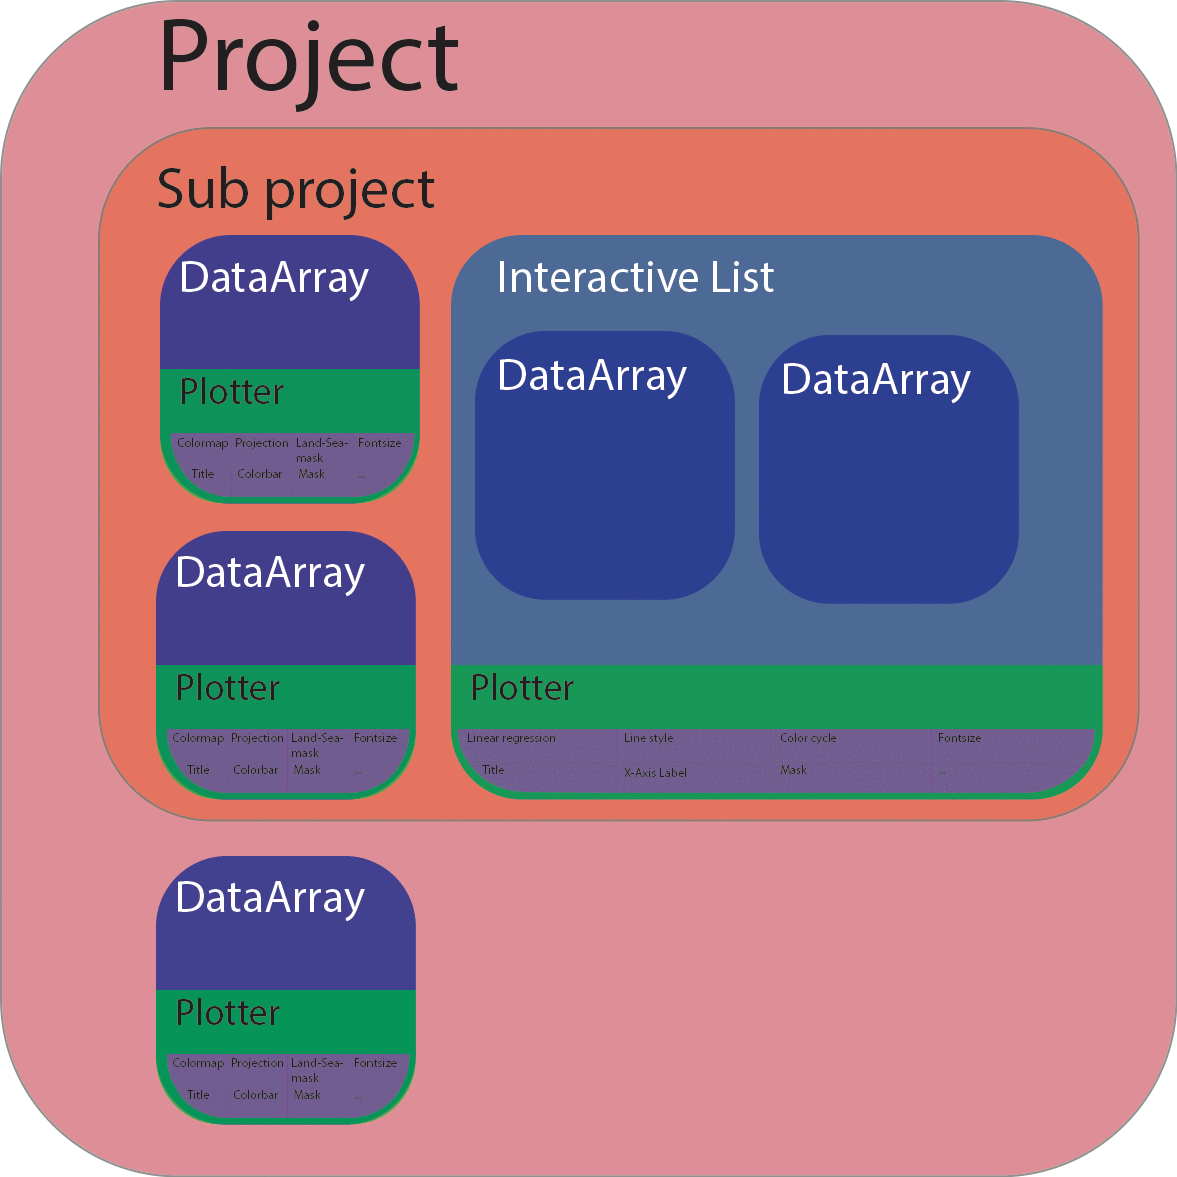
</div>

## Let's code and work on some data!

In [1]:
cd data

/home/psommer/Documents/code/docs/psyplot-hzg-presentation-20200204/data


## Low-level interface

In [2]:
from psyplot.plotter import Formatoption, Plotter

In [3]:
class MyFormatoption(Formatoption):
    default = 'my text'
    
    def update(self, value):
        self.ax.text(0.5, 0.5, value, fontsize='xx-large')

In [4]:
class MyPlotter(Plotter):
    my_fmt = MyFormatoption('my_fmt')

1 Main psyplot.project.Project([    arr0: 4-dim DataArray of t2m, with (time, lev, lat, lon)=(5, 4, 96, 192), ])

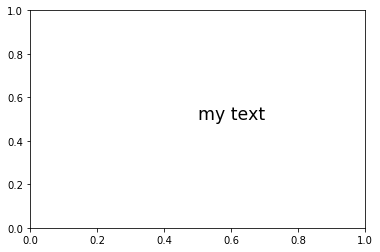

In [5]:
import psyplot.project as psy

ds = psy.open_dataset('demo.nc')

data = ds.t2m

plotter = MyPlotter(data)

project = psy.Project([data])
project

## High-level interface

In [6]:
psy.register_plotter('my_plotter', MyPlotter.__module__, 
                     'MyPlotter', MyPlotter)

psyplot.project.Project([    arr0: 4-dim DataArray of t2m, with (time, lev, lat, lon)=(5, 4, 96, 192), ])

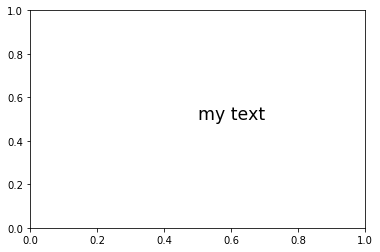

In [7]:
psy.plot.my_plotter('demo.nc', name='t2m')

## Plugins for visualization

psyplot is the core that defines the framework (Plotter, Formatoption, Project, CFDecoder), the plot methods are implemented by plugins:

- `psy-simple`: for standard 1D and 2D plot
    * e.g. lineplot, plot2d, vector, barplot
- `psy-maps`: for georeferenced plots (i.e. maps)
    * e.g. mapplot, mapvector, etc.
- `psy-reg`: for regression analysis
    * linreg, densityreg

## psy-simple

psyplot.project.Project([arr1: psyplot.data.InteractiveList([
    arr0: 1-dim DataArray of v, with (lat)=(96,), lon=0.0, lev=100000.0, time=1979-01-31T18:00:00,
    arr1: 1-dim DataArray of v, with (lat)=(96,), lon=0.0, lev=100000.0, time=1979-02-28T18:00:00,
    arr2: 1-dim DataArray of v, with (lat)=(96,), lon=0.0, lev=100000.0, time=1979-03-31T18:00:00,
    arr3: 1-dim DataArray of v, with (lat)=(96,), lon=0.0, lev=100000.0, time=1979-04-30T18:00:00,
    arr4: 1-dim DataArray of v, with (lat)=(96,), lon=0.0, lev=100000.0, time=1979-05-31T18:00:00])])

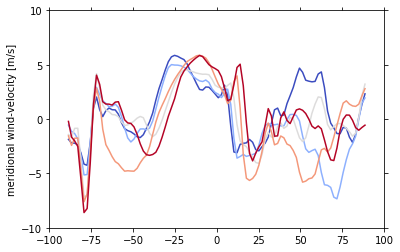

In [8]:
lines = psy.plot.lineplot(
    'demo.nc',        # netCDF file storing the data
    name='v',         # variable name
    t=range(5),       # one line per timestep
    z=0,              # first vertical level (dimension lev)
    x=0,              # first longitude step (dimension lon)
    ylabel="{desc}",  # use the longname and units on the y-axis
    color='coolwarm', # use the coolwarm colormap for the lines
    yticks=range(-10, 11, 5),  # explicitly set ticks on y-axis
    legend=False
)
lines

## Formatoptions

In [9]:
lines.keys()

+----------------+----------------+----------------+----------------+
| axiscolor      | color          | coord          | error          |
+----------------+----------------+----------------+----------------+
| erroralpha     | figtitle       | figtitleprops  | figtitlesize   |
+----------------+----------------+----------------+----------------+
| figtitleweight | grid           | labelprops     | labelsize      |
+----------------+----------------+----------------+----------------+
| labelweight    | legend         | legendlabels   | linewidth      |
+----------------+----------------+----------------+----------------+
| marker         | markersize     | maskbetween    | maskgeq        |
+----------------+----------------+----------------+----------------+
| maskgreater    | maskleq        | maskless       | plot           |
+----------------+----------------+----------------+----------------+
| post           | post_timing    | sym_lims       | text           |
+----------------+--

## Formatoptions

In [10]:
lines.docs('ylabel')

ylabel
Set the y-axis label

Set the label for the y-axis.
You can insert any meta key from the :attr:`xarray.DataArray.attrs` via a
string like ``'%(key)s'``. Furthermore there are some special cases:

- Strings like ``'%Y'``, ``'%b'``, etc. will be replaced using the
  :meth:`datetime.datetime.strftime` method as long as the data has a time
  coordinate and this can be converted to a :class:`~datetime.datetime`
  object.
- ``'%(x)s'``, ``'%(y)s'``, ``'%(z)s'``, ``'%(t)s'`` will be replaced
  by the value of the x-, y-, z- or time coordinate (as long as this
  coordinate is one-dimensional in the data)
- any attribute of one of the above coordinates is inserted via
  ``axis + key`` (e.g. the name of the x-coordinate can be inserted via
  ``'%(xname)s'``).
- Labels defined in the :class:`psyplot.rcParams` ``'texts.labels'`` key
  are also replaced when enclosed by '{}'. The standard labels are

  - tinfo: ``%H:%M``
  - dtinfo: ``%B %d, %Y. %H:%M``
  - dinfo: ``%B %d, %Y``
  - desc: ``%

## Plot methods

In [11]:
psy.plot.show_plot_methods()

barplot
    Make a bar plot of one-dimensional data
combined
    Plot a 2D scalar field with an overlying vector field
density
    Make a density plot of point data
densityreg
    Make a density plot and draw a fit from x to y of points
fldmean
    Calculate and plot the mean over x- and y-dimensions
lineplot
    Make a line plot of one-dimensional data
linreg
    Draw a fit from x to y
mapcombined
    Plot a 2D scalar field with an overlying vector field on a map
mapplot
    Plot a 2D scalar field on a map
mapvector
    Plot a 2D vector field on a map
my_plotter
    Open and plot data via :class:`__main__.MyPlotter` plotters
plot2d
    Make a simple plot of a 2D scalar field
vector
    Make a simple plot of a 2D vector field
violinplot
    Make a violin plot of your data


## Maps

psyplot.project.Project([    arr2: 2-dim DataArray of t2m, with (lat, lon)=(96, 192), lev=100000.0, time=1979-01-31T18:00:00])

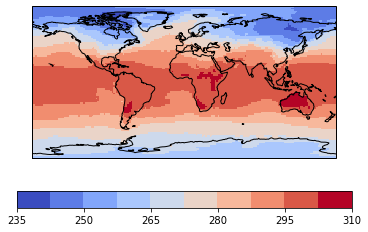

In [12]:
ds.psy.plot.mapplot(name='t2m')

## Maps

### (Some) Special Formatoptions for Maps

- **lonlatbox**: Specify the longitude-latitude box (via numbers, or countries/continents, etc.). Data outside this region will be masked in the array.
- **map_extent**: Same as *lonlatbox* but without masking
- **projection**: Projection for the plot. Can be `'ortho'`, `'cyl'`, etc. or anything from https://scitools.org.uk/cartopy/docs/latest/crs/projections.html
- **lsm**: Draw a land-sea-mask from a natural earth shapefile
- **stock_img**: Draw a colored image on the map to distinguish ocean and continents

## Maps

psyplot.project.Project([    arr3: 2-dim DataArray of t2m, with (lat, lon)=(96, 192), lev=100000.0, time=1979-01-31T18:00:00])

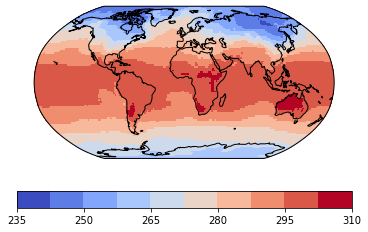

In [13]:
ds.psy.plot.mapplot(
    name='t2m', projection='robin')

## Grid structures

### Rectilinear

psyplot.project.Project([    arr4: 2-dim DataArray of t2m, with (lat, lon)=(96, 192), lev=100000.0, time=1979-01-31T18:00:00])

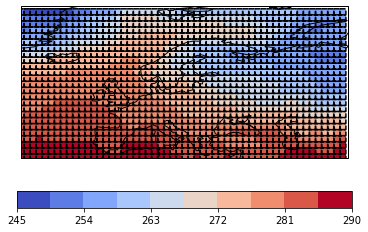

In [14]:
ds = psy.open_dataset('demo.nc')
ds
ds.psy.plot.mapplot(
    name='t2m', lonlatbox='Europe', datagrid='k--')

## Grid structures

### Circumpolar (2D coordinates)

In [15]:
import warnings
warnings.filterwarnings('ignore', '.*')

psyplot.project.Project([    arr5: 2-dim DataArray of T, with (rlat, rlon)=(111, 101), time=1983-12-01T21:00:00, level=0])

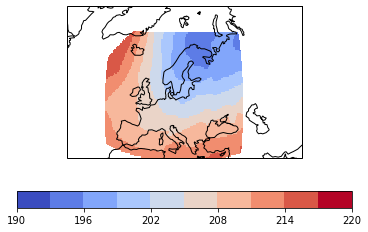

In [16]:
ds = psy.open_dataset('T.nc')
ds
ds.psy.plot.mapplot(
    name='T', projection='ortho', 
    lonlatbox='Europe')

psyplot.project.Project([    arr6: 2-dim DataArray of T, with (rlat, rlon)=(111, 101), time=1983-12-01T21:00:00, level=0])

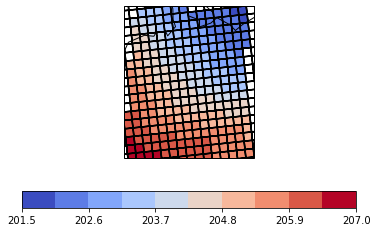

In [17]:
ds = psy.open_dataset('T.nc')
ds
ds.psy.plot.mapplot(
    name='T', projection='ortho', 
    lonlatbox='Germany', datagrid='k-')

## Grid structures

### ICON (triangular, hexagonal, etc.)

psyplot.project.Project([
    arr7: 1-dim DataArray of t2m, with (ncells)=(5120,), time=1979-01-31T18:00:00, lev=100000.0,
    arr8: 1-dim DataArray of t2m_edge, with (edge)=(480,), time=1979-01-31T18:00:00, lev=100000.0])

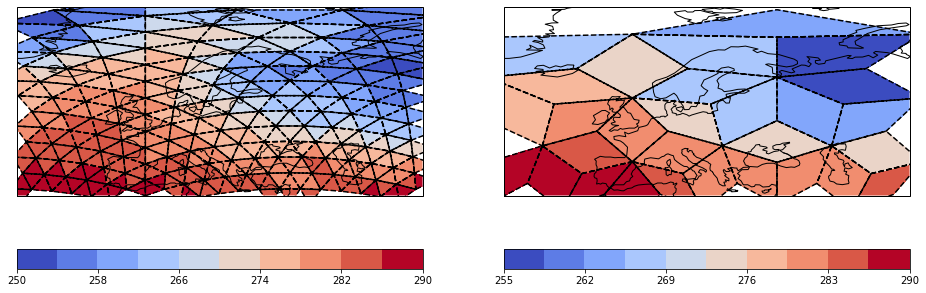

In [18]:
ds = psy.open_dataset('icon_grid_demo.nc')
ds
ds.psy.plot.mapplot(
    name=['t2m', 't2m_edge'], ax=(1, 2),
    lonlatbox='Europe', datagrid='k--')

## Grid structures

### Unstructured (UGRID)

psyplot.project.Project([    arr9: 1-dim DataArray of Mesh2_height, with (nMesh2_face)=(113885,), Mesh2=-2147483647, time=1950-01-01T04:11:59.999742507])

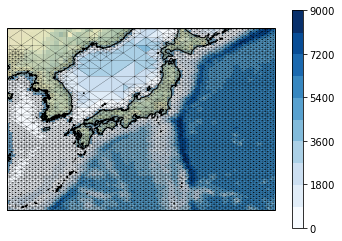

In [19]:
ds = psy.open_dataset('ugrid_demo.nc')
ds
ds.psy.plot.mapplot(
    name='Mesh2_height', load=True,
    maskleq=0, lonlatbox='Japan', cmap='Blues', 
    cbar='r', stock_img=True, lsm='10m',
    datagrid={'c': 'k', 'lw': 0.1})

## Other features

### Save and load projects

------------------------------------------------
-rw-r--r-- 1 SommerP psommer 3.7K Feb  5 19:07 my-project.pkl
------------------------------------------------


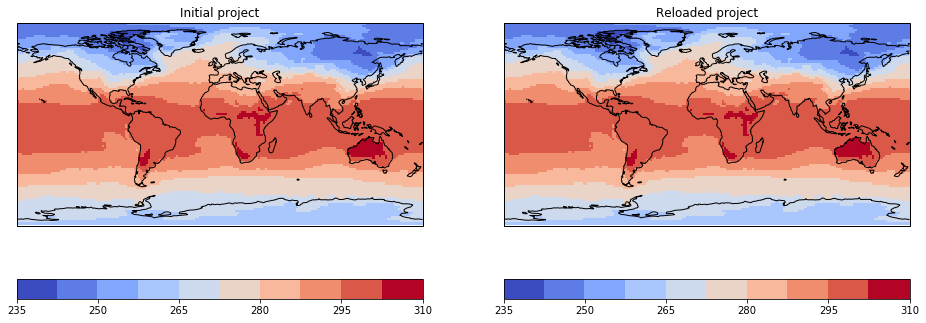

In [20]:
axes = psy.multiple_subplots(1, 2, n=2, for_maps=True)
initial = psy.plot.mapplot('demo.nc', name='t2m', ax=axes[0], title='Initial project')
initial.save_project('my-project.pkl')
print('------------------------------------------------')
!ls -hl my-project.pkl
print('------------------------------------------------')

reloaded = psy.Project.load_project('my-project.pkl', alternative_axes=[axes[1]])
reloaded.update(title='Reloaded project')

## Other features

### The graphical user interface

In [21]:
#!psyplot -p my-project.pkl

## Other features

### Export plots

In [22]:
sp = psy.plot.mapplot('demo.nc', name='t2m', time=[0, 1, 2], 
                      title='%(time)s')
sp.export('step-%i.png')
psy.close('all')
!ls step-?.png

step-1.png  step-2.png	step-3.png


In [23]:
from IPython.display import display, HTML, Image
s = '<table><tr><td><img src="data/step-1.png"></td><td><img src="data/step-2.png"></td><td><img src="data/step-3.png"></td></tr></table>'
display(HTML(s))

## Other features

### Update plots

In [24]:
# make some jupyter specific config
%config InlineBackend.close_figures = False
psy.rcParams['auto_show'] = True

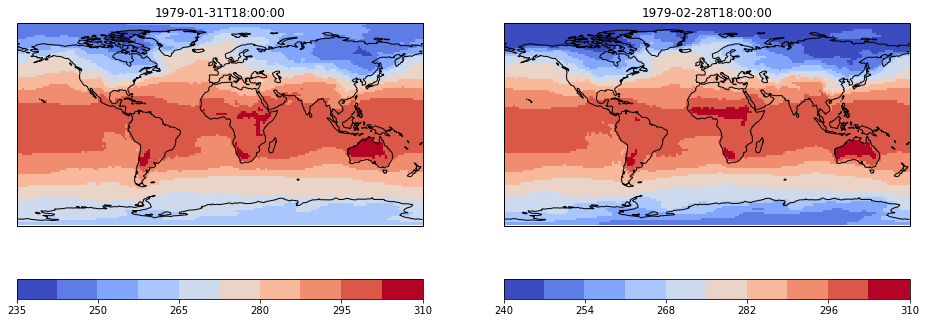

In [25]:
psy.close('all')
sp = psy.plot.mapplot('demo.nc', name='t2m', time=[0, 1],
                      ax=(1, 2), title='%(time)s')

In [26]:
psy.plot.mapplot.keys()

+----------------+----------------+----------------+----------------+
| bounds         | cbar           | cbarspacing    | clabel         |
+----------------+----------------+----------------+----------------+
| clabelprops    | clabelsize     | clabelweight   | clat           |
+----------------+----------------+----------------+----------------+
| clip           | clon           | cmap           | cticklabels    |
+----------------+----------------+----------------+----------------+
| ctickprops     | cticks         | cticksize      | ctickweight    |
+----------------+----------------+----------------+----------------+
| datagrid       | extend         | figtitle       | figtitleprops  |
+----------------+----------------+----------------+----------------+
| figtitlesize   | figtitleweight | grid_color     | grid_labels    |
+----------------+----------------+----------------+----------------+
| grid_labelsize | grid_settings  | interp_bounds  | levels         |
+----------------+--

## Other features

### Update plots

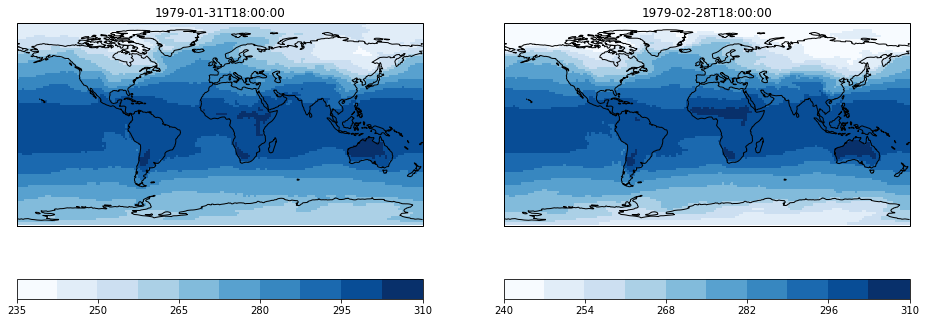

In [27]:
sp.update(cmap='Blues')


In [28]:
# make some jupyter specific config
%config InlineBackend.close_figures = True
psy.rcParams['auto_show'] = False
psy.close('all')

## Other features

### Generate plots from the command line

In [29]:
!echo 'projection: robin' > fmt.yml
!psyplot demo.nc -n t2m -pm mapplot -fmt fmt.yml -o output.png

/home/psommer/miniconda3/envs/psyplot-presi/lib/python3.7/site-packages/psyplot/data.py:2028: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  decode_coords=False, **kwargs)
/home/psommer/miniconda3/envs/psyplot-presi/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


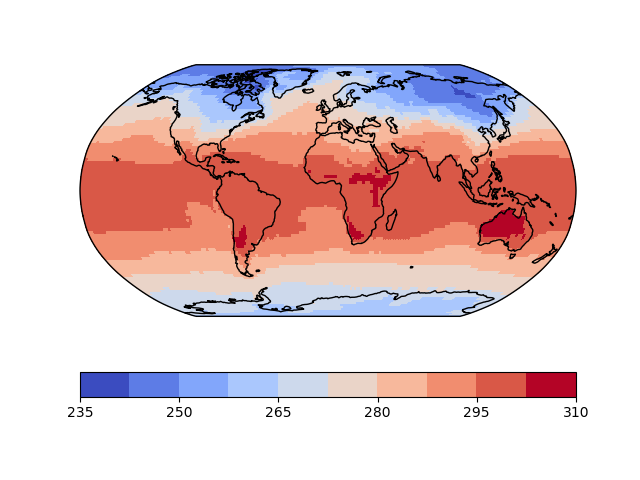

In [30]:
display(Image('output.png'))

## 3D visualization (not matplotlib, VTK)

In [31]:
import psy_vtk.plotters as pvtk

In [32]:
ds = psy.open_dataset('icon_grid_demo.nc')
data = ds.psy.t2m.psy[0, 0]

globe_plot = pvtk.GlobePlotter(data, cmap='viridis', datagrid=True)
disp = globe_plot.ax.show()
disp

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

## 3D visualization (not matplotlib, VTK)

In [33]:
globe_plot.update(cmap='Reds')
disp.clone()

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

## 3D visualization (not matplotlib, VTK)

### Support for all grids (out-of-the-box!)

In [34]:
data

<xarray.DataArray 't2m' (ncells: 5120)>
array([268.0231 , 267.82184, 270.76376, ..., 284.9598 , 281.40765, 285.71848],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1979-01-31T18:00:00
    clon     (ncells) float64 ...
    clat     (ncells) float64 ...
    lev      float64 1e+05
Dimensions without coordinates: ncells
Attributes:
    long_name:                    Temperature
    units:                        K
    code:                         130
    table:                        128
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [35]:
ds = psy.open_dataset('T.nc')
data = ds.T[0, 0]

globe_plot = pvtk.GlobePlotter(data, cmap='viridis', datagrid=True)
globe_plot.ax.show()

VTK(vtkXOpenGLRenderWindow, height=400, sizing_mode='stretch_width')

## Advanced implementation: Transect through your data

Extract the data along a line and plot the vertical profile with respect to the underlying orography.

In [36]:
temperature = psy.open_dataset('T.nc').psy.T.psy[0]
orography = psy.open_dataset('lffd1980010100c.nc').psy.HHL.psy[0]

In [37]:
temperature

<xarray.DataArray 'T' (level: 40, rlat: 111, rlon: 101)>
[448440 values with dtype=float32]
Coordinates:
    lat      (rlat, rlon) float32 ...
    lon      (rlat, rlon) float32 ...
  * rlat     (rlat) float32 -24.09 -23.65 -23.21 -22.77 ... 23.43 23.87 24.31
  * rlon     (rlon) float32 -25.13 -24.69 -24.25 -23.81 ... 17.99 18.43 18.87
    time     datetime64[ns] 1983-12-01T21:00:00
Dimensions without coordinates: level
Attributes:
    standard_name:  air_temperature
    long_name:      temperature
    units:          K
    grid_mapping:   rotated_pole
    cell_methods:   time: point

In [38]:
orography

<xarray.DataArray 'HHL' (level1: 41, rlat: 111, rlon: 101)>
[459651 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 1980-01-01
  * rlon     (rlon) float32 -25.13 -24.69 -24.25 -23.81 ... 17.99 18.43 18.87
  * rlat     (rlat) float32 -24.09 -23.65 -23.21 -22.77 ... 23.43 23.87 24.31
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
Dimensions without coordinates: level1
Attributes:
    standard_name:  altitude
    long_name:      height
    units:          m
    grid_mapping:   rotated_pole
    positive:       up
    cell_methods:   time: point

## The transect

In [39]:
import numpy as np
import matplotlib.pyplot as plt

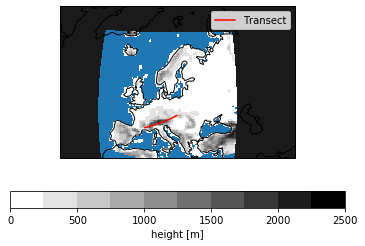

In [40]:
min_orog = orography.min('level1', keep_attrs=True)
min_orog.encoding['coordinates'] = orography.encoding['coordinates']
plotter = min_orog.psy.plot.mapplot(
    cmap='binary', maskleq=0, miss_color='#1f77b4',
    projection='ortho', lonlatbox='Europe', clabel='{desc}');
plotter.ax.background_patch.set_facecolor('0.1')

points = np.vstack([np.linspace(4, 18, 200), np.linspace(44, 49, 200)]).T 

line = plotter.ax.plot(
    points[:, 0], points[:, 1], color='r', transform=plotter.transform.projection)
plt.legend(line, ['Transect']);

## The transect formatoption

In [41]:
from psyplot.plotter import START
from sklearn.neighbors import BallTree
from psyplot.utils import unique_everseen
import xarray as xr

class Transect(Formatoption):
    priority = START  # first phase for psyplot, data manipulation
    
    @property
    def default(self):  # placeholder
        return None
    
    def update(self, value):
        data = self.data[0]
        
        lon = self.decoder.get_x(data, data.coords)
        lat = self.decoder.get_y(data, data.coords)

        if lon.shape != data.shape[1:]:
            lon, lat = np.meshgrid(lon, lat)
        lon = np.ravel(lon)
        lat = np.ravel(lat)

        # find the closest grid cell using some efficient machine learning library
        tree = BallTree(np.vstack([lon, lat]).T)
        indices = np.array(list(unique_everseen(tree.query(
            value, return_distance=False, sort_results=False)[:, 0])))
        
        # select the closest grid cells in orography and scalar variable (T)
        arrays = self.data
        new_arrays = []
        for da in arrays:
            nlev = da.shape[0]
            arr = da.values.reshape((nlev, -1))[:, indices]
            coords = {key: val for key, val in da.coords.items() if val.dims == da.dims[:1]}
            new_arrays.append(xr.DataArray(
                arr, dims=(da.dims[0], '_cell'), 
                coords=coords))
        new_scalar, new_orography = new_arrays
        
        # turn orography into a 2D coordinate with CF conforming bounds
        new_orography = np.dstack([new_orography.T[:, :-1], 
                                   new_orography.T[:, 1:]])
        new_scalar.name = data.name
        new_scalar.encoding['coordinates'] = 'orography _cell_coord'
        new_scalar['orography'] = (new_scalar.dims, new_orography.mean(-1).T)
        new_scalar['orography'].attrs['bounds'] = 'orography_bnds'
        new_scalar['orography'].attrs['axis'] = 'Y'
        
        # turn grid cell into a 2D coordinate 
        new_scalar['_cell'] = ('_cell', np.arange(len(indices)))
        
        new_scalar['_cell_coord'] = xr.Variable(
            new_scalar.dims, 
            np.repeat(
                np.arange(new_scalar.shape[1])[None] + 0.5,
                new_scalar.shape[0], 0),
            attrs={'axis': 'X'})
        
        # save the bounds in the base dataset (necessary cause of xarray)
        base = new_scalar.psy.base
        base['orography_bnds'] = (new_scalar.dims[::-1] + ('_bnds',), new_orography)
        base['orography_bnds'] = base.orography_bnds.transpose(
            *(new_scalar.dims + ('_bnds',)))
        new_scalar.psy.base = base.set_coords('orography_bnds')
        new_scalar.attrs.update(data.attrs)
        
        # update the data - this also updates the data for every plotter
        self.data = new_scalar
        

## The transect plotter

In [42]:
from psy_simple.plotters import Simple2DPlotter, SimplePlot2D, Ylim2D, DataGrid


class TransectPlot2d(SimplePlot2D):
    
    @property
    def raw_data(self):
        return self.data
    
class TransectYlim(Ylim2D):
    
    @property
    def raw_data(self):
        return self.data
    
class TransectDataGrid(DataGrid):
    
    @property
    def raw_data(self):
        return self.data
    
class TransectPlotter(Simple2DPlotter):
    transect = Transect('transect')
    plot = TransectPlot2d('plot')
    ylim = TransectYlim('ylim')
    datagrid = TransectDataGrid('datagrid')
    
    allowed_dims = 3
    
    def get_enhanced_attrs(self, arr, *args, **kwargs):
        return getattr(arr, 'attrs', {})
        

## Combining temperature and orography into one InteractiveList

In [43]:
import psyplot.data as psyd
data = psyd.InteractiveList([
    temperature,
    orography
])
for da in data:
    da[da.dims[0]] = (da.dims[0], np.arange(da.shape[0]))
data

arr0: psyplot.data.InteractiveList([
    arr0: 3-dim DataArray of T, with (level, rlat, rlon)=(40, 111, 101), time=1983-12-01T21:00:00,
    arr1: 3-dim DataArray of HHL, with (level1, rlat, rlon)=(41, 111, 101), time=1980-01-01])

## That's it!

<xarray.Dataset>
Dimensions:         (_bnds: 2, _cell: 29, level: 40)
Coordinates:
  * level           (level) int64 0 1 2 3 4 5 6 7 8 ... 32 33 34 35 36 37 38 39
    orography       (level, _cell) float32 21750.0 21750.0 ... 305.6878 402.2965
  * _cell           (_cell) int64 0 1 2 3 4 5 6 7 8 ... 21 22 23 24 25 26 27 28
    _cell_coord     (level, _cell) float64 0.5 1.5 2.5 3.5 ... 26.5 27.5 28.5
    orography_bnds  (level, _cell, _bnds) float32 22700.0 20800.0 ... 392.64005
Dimensions without coordinates: _bnds
Data variables:
    T               (level, _cell) float32 207.45358 207.35056 ... 263.18335

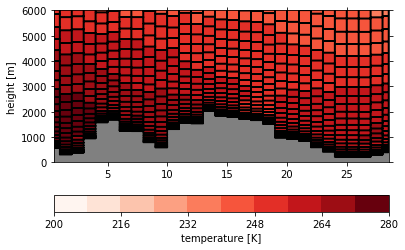

In [44]:
plotter = TransectPlotter(
    data, transect=points.tolist(), xlim='minmax', plot='poly',
    ylim='minmax', cmap='Reds', clabel='{desc}', ylabel='height [m]')
plotter.ax.set_facecolor('0.5')
plotter.update(datagrid='k-', mask_datagrid=False, ylim=(0, 6000))
plotter.plot_data.psy.base

## Summary

### The framework
- the psyplot core for the data model, and plugins for various visualizations
- designed to be flexible and sustainable
- equipped via flexible graphical user interface

### The data model
- based on a netCDF-like infrastructure and interpretes CF- and UGRID conventions
- support for multiple grids: rectilinear, circumpolar and unstructured

### Scriptability
- close to the data with a minimum of visualization overhead (compared to Paraview or something else)
- can easily be enhanced by other powerful libraries, such as scipy, scikit-learn, etc.

## Roadmap for 2020

**General features**
- Transfer psyplot repositories to https://github.com/psyplot
- 3D visualization using vtk (see https://github.com/Chilipp/psy-vtk)
- Exporting psyplot projects as scripts (see https://github.com/Chilipp/psyplot/issues/4)
- add animation features (see https://github.com/Chilipp/psyplot/issues/10 and https://github.com/Chilipp/psyplot-gui/issues/7)

**GUI**
- A more intuitive widget for updating central formatoptions in the GUI (e.g. colorbar, colormap, etc.). This could be implemented as plugins for the GUI in the individual package (psy-simple, psy-maps, etc.) (see https://github.com/Chilipp/psyplot-gui/issues/7#issuecomment-562529774)
- Generate time-series (or any other dimension) by clicking on a grid cell in a map (such as ncview does it, see https://github.com/Chilipp/psyplot-gui/issues/7#issuecomment-562529774)

**Technical issues**
- The sharing of formatoptions needs to be improved. The strategy within the `Project.update` method (currently it is using one `Thread` per array in the project) needs to be revised. My suggestions is to rather update all formatoptions (and dimensions) in one single thread using some kind of dependency graph